# TensorFlow基础

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## 数据类型

### 数值类型

标量在 TensorFlow 是如何创建的

In [2]:
# python 语言方式创建标量
a = 1.2 
# TF 方式创建标量
aa = tf.constant(1.2)

type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

如果要使用 TensorFlow 提供的功能函数， 须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [3]:
x = tf.constant([1,2.,3.3])
# 打印 TF 张量的相关信息                
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [4]:
# 将 TF 张量的数据导出为 numpy 数组格式
x.numpy() 

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过 List 容器传给 tf.constant()函数。

创建一个元素的向量：

In [5]:
# 创建一个元素的向量
a = tf.constant([1.2]) 
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

创建 3 个元素的向量：

In [6]:
 # 创建 3 个元素的向量
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

定义矩阵

In [7]:
# 创建 2 行 2 列的矩阵
a = tf.constant([[1,2],[3,4]]) 
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>,
 TensorShape([2, 2]))

三维张量可以定义为：

In [8]:
# 创建 3 维张量
tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]]) 

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

通过传入字符串对象即可创建字符串类型的张量

In [9]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 字符串类型

通过传入字符串对象即可创建字符串类型的张量

In [10]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化 lower()、 拼接
join()、 长度 length()、 切分 split()等。

In [11]:
# 小写化字符串
tf.strings.lower(a) 

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

### 布尔类型
布尔类型的张量只需要传入 Python 语言的布尔类型数据，转换成 TensorFlow 内部布尔型即可。

In [12]:
# 创建布尔类型标量
tf.constant(True) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

创建布尔类型的向量

In [13]:
 # 创建布尔类型向量
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是， TensorFlow 的布尔类型和 Python 语言的布尔类型并不等价，不能通用

In [14]:
# 创建 TF 布尔张量
a = tf.constant(True) 
# TF 布尔类型张量与 python 布尔类型比较
print(a is True) 
# 仅数值比较
print(a == True) 

False
tf.Tensor(True, shape=(), dtype=bool)


## 数值精度

在创建张量时，可以指定张量的保存精度

In [15]:
# 创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [16]:
tf.constant(123456789, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=123456789>

对于浮点数， 高精度的张量可以表示更精准的数据，例如采用 tf.float32 精度保存π时，实际保存的数据为 3.1415927

In [17]:
import numpy as np
# 从 numpy 中导入 pi 常量
np.pi 
# 32 位
tf.constant(np.pi, dtype=tf.float32) 

3.141592653589793

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用 tf.float64 精度保存π，则能获得更高的精度

In [18]:
tf.constant(np.pi, dtype=tf.float64) # 64 位

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [19]:
a = tf.constant(np.pi, dtype=tf.float16)

# 读取原有张量的数值精度
print('before:',a.dtype) 
# 如果精度不符合要求，则进行转换
if a.dtype != tf.float32: 
    # tf.cast 函数可以完成精度转换
    a = tf.cast(a,tf.float32) 
# 打印转换后的精度
print('after :',a.dtype) 

before: <dtype: 'float16'>
after : <dtype: 'float32'>


### 类型转换
系统的每个模块使用的数据类型、 数值精度可能各不相同， 对于不符合要求的张量的类型及精度， 需要通过 tf.cast 函数进行转换

In [20]:
# 创建 tf.float16 低精度张量
a = tf.constant(np.pi, dtype=tf.float16) 
# 转换为高精度张量
tf.cast(a, tf.double) 

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性， 例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患：

In [21]:
a = tf.constant(123456789, dtype=tf.int32)
# 转换为低精度整型
tf.cast(a, tf.int16) 

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔类型与整型之间相互转换也是合法的， 是比较常见的操作

In [22]:
a = tf.constant([True, False])
# 布尔类型转整型
tf.cast(a, tf.int32) 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认 0 表示 False， 1 表示 True，在 TensorFlow 中，将非 0 数字都视为 True，

In [23]:
a = tf.constant([-1, 0, 1, 2])
# 整型转布尔类型
tf.cast(a, tf.bool) 

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量

TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录： tf.Variable。 tf.Variable 类型在普通的张量类型基础上添加了 name， trainable 等属性来支持计算图的构建。

In [24]:
# 创建 TF 张量
a = tf.constant([-1, 0, 1, 2]) 
# 转换为 Variable 类型
aa = tf.Variable(a) 
# Variable 类型张量的属性
aa.name, aa.trainable 

('Variable:0', True)

name 属性用于命名计算图中的变量，这套命名体系是 TensorFlow 内部维护的， 一般不需要用户关注 name 属性；   
trainable属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置trainable=False 来设置张量不需要优化。

In [25]:
# 直接创建 Variable 张量
tf.Variable([[1,2],[3,4]]) 

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

## 创建张量

### 从数组、列表对象创建

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者Numpy Array 对象中的数据导入到新 Tensor 中。

In [26]:
# 从列表创建张量
tf.convert_to_tensor([1,2.]) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [27]:
# 从数组中创建张量
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) 

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

### 创建全0或全1张量

In [28]:
# 创建全 0，全 1 的标量
tf.zeros([]),tf.ones([]) 

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [29]:
# 创建全 0，全 1 的向量
tf.zeros([1]),tf.ones([1]) 

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全 0 的矩阵

In [30]:
# 创建全 0 矩阵，指定 shape 为 2 行 2 列
tf.zeros([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全 1 的矩阵

In [31]:
# 创建全 1 矩阵，指定 shape 为 3 行 2 列
tf.ones([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致， 且内容为全 0 或全 1 的张量。

In [32]:
# 创建一个矩阵
a = tf.ones([2,3]) 
# 创建一个与 a 形状相同，但是全 0 的新矩阵
tf.zeros_like(a) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量A形状一样的全 1 张量

In [33]:
# 创建一个矩阵
a = tf.zeros([3,2]) 
# 创建一个与 a 形状相同，但是全 1 的新矩阵
tf.ones_like(a) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

### 创建自定义数值张量

通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指定。

In [34]:
# 创建-1 的标量
tf.fill([], -1) 

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [35]:
# 创建-1 的向量
tf.fill([1], -1) 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-1])>

In [36]:
# 创建 2 行 2 列，元素全为 99 的矩阵
tf.fill([2,2], 99) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为mean，标准差为 stddev 的正态分布$\mathcal{N}(mean, stddev^2)$。

In [37]:
# 创建标准正态分布的张量
tf.random.normal([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.63831323,  0.83312804],
       [-1.4102253 ,  0.24303935]], dtype=float32)>

In [38]:
# 创建均值为 1，标准差为 2 的正态分布的张量
tf.random.normal([2,2], mean=1,stddev=2) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.6345923,  1.8404381],
       [ 1.7937942, -1.5469558]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量

In [39]:
# 创建采样自[0,1)均匀分布的矩阵
tf.random.uniform([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.08317411, 0.11959207],
       [0.5689585 , 0.64667904],
       [0.15649176, 0.6020361 ]], dtype=float32)>

In [40]:
# 创建采样自[0,10)均匀分布的矩阵
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[6.113701 , 6.7698774],
       [5.1222076, 4.5097685]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指定数据类型为 tf.int*型

In [41]:
# 创建采样自[0,100)均匀分布的整型矩阵
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40, 85],
       [97, 47]])>

### 创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。

In [42]:
# 0~10，不包含 10
tf.range(10) 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [43]:
# 创建 0~10，步长为 2 的整形序列
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [44]:
tf.range(1,10,delta=2) # 1~10

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用

### 标量

In [45]:
# 随机模拟网络输出
out = tf.random.uniform([4,10]) 
# 随机构造样本真实标签
y = tf.constant([2,3,2,0]) 
# one-hot 编码
y = tf.one_hot(y, depth=10) 
# 计算每个样本的 MSE
loss = tf.keras.losses.mse(y, out) 
# 平均 MSE,loss 应是标量
loss = tf.reduce_mean(loss) 
print(loss)

tf.Tensor(0.37264675, shape=(), dtype=float32)


### 向量

考虑 2 个输出节点的网络层， 创建长度为 2 的偏置向量b，并累加在每个输出节点上：

In [46]:
# z=wx,模拟获得激活函数的输入 z
z = tf.random.normal([4,2])
# 创建偏置向量
b = tf.zeros([2])
# 累加上偏置向量
z = z + b 
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.33739573, -0.4755593 ],
       [ 0.67105454, -0.05554426],
       [-1.0956205 ,  0.43591323],
       [-1.5428708 ,  0.62618303]], dtype=float32)>

创建输入节点数为 4，输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3

In [47]:
# 创建一层 Wx+b，输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
# 查看偏置向量
fc.bias 

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

In [48]:
# 2 个样本，特征长度为 4 的张量
x = tf.random.normal([2,4]) 
# 定义 W 张量
w = tf.ones([4,3])
# 定义 b 张量
b = tf.zeros([3]) 
# X@W+b 运算
o = x@w+b 
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.9897445,  0.9897445,  0.9897445],
       [-3.8175297, -3.8175297, -3.8175297]], dtype=float32)>

In [49]:
# 定义全连接层的输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 定义全连接层的输入节点为 4
fc.build(input_shape=(2,4)) 
# 查看权值矩阵 W
fc.kernel 

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.41081643, -0.0912447 , -0.18749475],
       [-0.71149904, -0.07780278,  0.4368075 ],
       [-0.35581762, -0.5862403 ,  0.4269439 ],
       [-0.235573  ,  0.1428225 ,  0.57331765]], dtype=float32)>

### 三维张量

In [50]:
# 自动加载 IMDB 电影评价数据集
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数， 80 表示每个句子共 80 个单词，每个单词使用数字编码方式表示。

通过 layers.Embedding 层将数字编码的单词转换为长度为 100 个词向量：

In [51]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过 Embedding 层编码后，句子张量的 shape 变为[25000,80,100]，其中 100 表示每个单词编码为长度是 100 的向量。

### 四维张量

In [52]:
## 会死机
# 创建 32x32 的彩色图片输入，个数为 4
'''
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
# 前向计算
out = layer(x) 
# 输出大小
out.shape 
'''

'\nx = tf.random.normal([4,32,32,3])\n# 创建卷积神经网络\nlayer = layers.Conv2D(16, kernel_size=3)\n# 前向计算\nout = layer(x) \n# 输出大小\nout.shape \n'

In [53]:
# 访问卷积核张量
#layer.kernel.shape 

## 索引与切片
### 索引

In [54]:
# 创建4维张量
x = tf.random.normal([4,32,32,3]) 

In [55]:
# 取第 1 张图片的数据
x[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 1.2545774 , -1.0170593 ,  0.02082   ],
        [ 0.21327215, -2.1825764 , -0.54671514],
        [-0.21446662,  0.28898394,  0.75723064],
        ...,
        [-1.8021274 , -0.42671084, -1.3394758 ],
        [-0.04653804,  0.5682521 , -1.4023389 ],
        [ 1.5029337 , -0.07159987,  0.57535034]],

       [[-0.27369487,  1.4121635 ,  0.28168362],
        [ 0.01800903, -0.7729349 ,  1.3797023 ],
        [-0.5168264 ,  1.1987525 , -0.30684844],
        ...,
        [ 2.3188171 , -0.14195183, -0.8707891 ],
        [ 0.42092633, -0.39236894,  1.1176186 ],
        [ 0.360246  , -0.58662724,  0.89317346]],

       [[ 0.46539912, -1.296782  , -0.76569223],
        [ 0.39905614, -0.43602353,  1.3001657 ],
        [ 1.3105263 ,  0.36291873,  1.6328793 ],
        ...,
        [ 0.82884216,  1.6621009 , -1.2801238 ],
        [ 0.43498784, -0.2771078 ,  1.213158  ],
        [ 0.98423755,  0.59390306,  1.0248052 ]],

       ...,

       

In [56]:
# 取第 1 张图片的第 2 行
x[0][1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[-0.27369487,  1.4121635 ,  0.28168362],
       [ 0.01800903, -0.7729349 ,  1.3797023 ],
       [-0.5168264 ,  1.1987525 , -0.30684844],
       [-0.9468006 ,  0.00732185, -0.00676857],
       [-2.256179  , -0.44373134, -0.0562191 ],
       [ 0.37595022,  0.9427263 , -2.758662  ],
       [-0.27143145,  1.4982243 , -1.7196097 ],
       [ 0.01312888,  0.6239445 , -1.2956845 ],
       [-3.1363857 ,  0.27454135, -0.5306218 ],
       [-0.78003544, -1.6704823 , -0.9359121 ],
       [-1.448802  ,  0.77224904, -0.41489652],
       [-0.48878458, -0.6514064 , -0.5546613 ],
       [ 1.1635596 , -0.48536378,  1.0009813 ],
       [-1.0121468 , -0.23655379, -0.25446948],
       [-0.33776426,  0.17118722, -1.0826678 ],
       [-1.3795882 , -0.9007333 , -0.12421604],
       [-1.1348493 , -0.86449414,  1.0518949 ],
       [ 0.43396842,  0.41446525,  0.21395993],
       [ 1.2850289 , -0.7291185 , -0.09188025],
       [ 2.0777323 , -1.772839  ,  0.08

In [57]:
# 取第 1 张图片，第 2 行，第 3 列的数据
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.5168264 ,  1.1987525 , -0.30684844], dtype=float32)>

In [58]:
# 取第 3 张图片，第 2 行，第 1 列的像素， B 通道(第 2 个通道)颜色强度值
x[2][1][0][1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.034506705>

In [59]:
# 取第 2 张图片，第 10 行，第 3 列的数据
x[1,9,2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.0922838 , -0.50789064, -1.2113303 ], dtype=float32)>

### 切片

In [60]:
# 读取第 2,3 张图片
x[1:3]

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 0.8867247 , -0.338028  , -1.4309174 ],
         [ 1.5751325 , -0.96558064,  1.0024261 ],
         [-1.0185283 , -1.6963713 ,  0.7937141 ],
         ...,
         [-0.5661966 , -1.1826229 , -0.29436755],
         [-1.2304176 ,  0.04800363, -0.8876361 ],
         [ 0.2903763 , -0.46952146,  2.1569552 ]],

        [[ 0.23080467, -0.69749624,  1.1988776 ],
         [ 1.8113406 ,  1.0741656 , -1.253679  ],
         [ 1.3089635 ,  1.3956884 ,  0.01996148],
         ...,
         [-1.6520303 , -0.19735892,  1.4991722 ],
         [-0.56144375, -1.4162642 , -0.36117023],
         [-1.0155089 ,  0.448156  , -0.5519001 ]],

        [[ 1.8318013 ,  0.9017905 ,  0.4290015 ],
         [-0.5160071 ,  1.7883003 , -0.23343036],
         [ 0.61453795,  0.23706722,  0.10774346],
         ...,
         [ 2.192905  , -0.89318717,  0.2719069 ],
         [ 0.22355455,  2.056685  , -0.97920996],
         [ 1.9134163 , -0.2084771 , -0.38167936]

In [61]:
# 读取第一张图片
x[0,::] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 1.2545774 , -1.0170593 ,  0.02082   ],
        [ 0.21327215, -2.1825764 , -0.54671514],
        [-0.21446662,  0.28898394,  0.75723064],
        ...,
        [-1.8021274 , -0.42671084, -1.3394758 ],
        [-0.04653804,  0.5682521 , -1.4023389 ],
        [ 1.5029337 , -0.07159987,  0.57535034]],

       [[-0.27369487,  1.4121635 ,  0.28168362],
        [ 0.01800903, -0.7729349 ,  1.3797023 ],
        [-0.5168264 ,  1.1987525 , -0.30684844],
        ...,
        [ 2.3188171 , -0.14195183, -0.8707891 ],
        [ 0.42092633, -0.39236894,  1.1176186 ],
        [ 0.360246  , -0.58662724,  0.89317346]],

       [[ 0.46539912, -1.296782  , -0.76569223],
        [ 0.39905614, -0.43602353,  1.3001657 ],
        [ 1.3105263 ,  0.36291873,  1.6328793 ],
        ...,
        [ 0.82884216,  1.6621009 , -1.2801238 ],
        [ 0.43498784, -0.2771078 ,  1.213158  ],
        [ 0.98423755,  0.59390306,  1.0248052 ]],

       ...,

       

In [62]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[ 1.2545774e+00, -1.0170593e+00,  2.0820003e-02],
         [-2.1446662e-01,  2.8898394e-01,  7.5723064e-01],
         [-8.3671939e-01, -1.6107623e-01, -9.1035205e-01],
         ...,
         [ 1.5878419e+00,  6.0463589e-01,  8.3175009e-01],
         [-6.0506177e-01,  6.6002417e-01, -4.2977223e-01],
         [-3.2438061e-01,  7.9472029e-01, -7.8513235e-01]],

        [[ 4.6539912e-01, -1.2967820e+00, -7.6569223e-01],
         [ 1.3105263e+00,  3.6291873e-01,  1.6328793e+00],
         [ 2.0225037e-02, -1.0550002e-01,  1.1871971e+00],
         ...,
         [ 1.4087859e+00, -2.4079413e+00,  9.7291535e-01],
         [ 6.5193951e-02,  1.0466748e+00, -1.0891838e+00],
         [-7.8339882e-02, -2.6639089e-01, -6.2809622e-01]],

        [[ 2.2390328e-01,  1.2526652e+00,  3.1956699e-01],
         [-4.0274900e-01, -1.0830327e+00, -1.0377827e+00],
         [-2.3247400e-01, -1.8664018e+00, -6.1416805e-01],
         ...,
         [ 2.

In [63]:
# 考虑一个 0~9 的简单序列向量， 逆序取到第 1 号元素，不包含第 1 号
# 创建 0~9 向量
x = tf.range(9) 
# 从 8 取到 0，逆序，不包含 0
x[8:0:-1] 

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1])>

In [64]:
# 逆序全部元素
x[::-1] 

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

In [65]:
# 逆序间隔采样
x[::-2] 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0])>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样

In [66]:
x = tf.random.normal([4,32,32,3])
# 行、列逆序间隔采样
x[0,::-2,::-2] 

<tf.Tensor: shape=(16, 16, 3), dtype=float32, numpy=
array([[[-9.95936394e-02,  8.82336736e-01, -2.22658459e-02],
        [ 7.01684296e-01,  7.04878867e-01, -4.64812666e-01],
        [-1.93915024e-01, -6.48531139e-01,  1.15222013e+00],
        [-6.32495224e-01,  4.31432337e-01,  8.35550249e-01],
        [-7.31612742e-01,  6.85788691e-01,  4.48920757e-01],
        [-3.45843911e-01, -1.47717917e+00,  1.06461942e+00],
        [ 1.14014447e+00, -5.02861798e-01, -7.57571459e-01],
        [ 1.55264223e+00, -4.87770706e-01,  1.78656876e-01],
        [-3.07022452e-01, -4.30840731e-01, -3.00106823e-01],
        [ 1.17470670e+00,  1.26714694e+00, -3.43394101e-01],
        [ 6.25606835e-01, -1.21786499e+00, -2.69864619e-01],
        [ 1.89580858e+00, -8.69623780e-01, -7.26907611e-01],
        [-8.33853126e-01, -1.53253770e+00,  9.80700254e-01],
        [-6.70542657e-01,  4.02551055e-01, -1.85248375e+00],
        [-8.74813795e-01,  1.24636018e+00, -1.29300486e-02],
        [-6.04968905e-01,  1.800

In [67]:
# 取 G 通道数据
x[:,:,:,1] 

<tf.Tensor: shape=(4, 32, 32), dtype=float32, numpy=
array([[[-0.43485448,  0.59878385,  0.10812633, ...,  0.37309998,
         -1.8077748 ,  1.2934529 ],
        [ 0.67328906,  0.14873162, -0.06061584, ..., -0.8654932 ,
         -0.11128695,  2.0300915 ],
        [-0.13634354,  1.1417246 , -0.00953978, ...,  0.7543638 ,
         -0.54992014,  0.47776836],
        ...,
        [ 0.07220273,  0.35415533,  1.5137832 , ..., -0.3637382 ,
          0.2252399 , -0.9475587 ],
        [ 1.2919954 ,  0.54189277,  0.9535876 , ..., -0.87958264,
          1.6228554 , -0.13720566],
        [-0.21788535,  1.8001691 , -0.323124  , ...,  0.70487887,
          0.3843003 ,  0.88233674]],

       [[ 0.2524799 ,  1.0996078 ,  0.22496632, ...,  0.1850968 ,
          1.7631083 ,  0.10119608],
        [ 1.2359561 , -0.66114783,  0.0201116 , ...,  0.7427121 ,
         -1.0807939 ,  0.24089292],
        [ 0.32663518,  1.3744712 ,  2.662527  , ..., -0.8146008 ,
         -0.16113637, -1.5895308 ],
        ...,
 

In [68]:
# 读取第 1~2 张图片的 G/B 通道数据
# 高宽维度全部采集
x[0:2,...,1:] 

<tf.Tensor: shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[-0.43485448, -2.3243394 ],
         [ 0.59878385,  0.50591636],
         [ 0.10812633,  0.0740279 ],
         ...,
         [ 0.37309998,  0.552228  ],
         [-1.8077748 , -1.1232791 ],
         [ 1.2934529 , -0.74371374]],

        [[ 0.67328906,  1.6542827 ],
         [ 0.14873162,  1.2779055 ],
         [-0.06061584,  1.32513   ],
         ...,
         [-0.8654932 , -2.3799353 ],
         [-0.11128695,  0.02212252],
         [ 2.0300915 ,  0.12315395]],

        [[-0.13634354, -0.8924387 ],
         [ 1.1417246 , -0.510152  ],
         [-0.00953978, -0.52842844],
         ...,
         [ 0.7543638 ,  1.1858222 ],
         [-0.54992014,  0.7185566 ],
         [ 0.47776836,  0.9088925 ]],

        ...,

        [[ 0.07220273,  0.38777035],
         [ 0.35415533,  0.69977856],
         [ 1.5137832 , -1.8282644 ],
         ...,
         [-0.3637382 , -0.19612084],
         [ 0.2252399 ,  1.3547904 ],
         [-0.9475

In [69]:
# 读取最后 2 张图片
# 高、宽、通道维度全部采集，等价于 x[2:]
x[2:,...] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 5.8449280e-01, -3.8185171e-03, -1.1533016e+00],
         [ 1.0114981e+00, -6.6163331e-02,  1.6588715e+00],
         [ 2.2398436e+00,  1.2527987e+00, -6.4843196e-01],
         ...,
         [-2.8734022e-01,  6.8851000e-01, -3.5598832e-01],
         [-3.7197772e-01,  5.3657079e-01,  2.2014954e+00],
         [ 8.6628121e-01, -3.9960831e-01,  4.6039239e-01]],

        [[-7.1151160e-02,  3.3730692e-01, -1.0924158e+00],
         [-3.1732145e-01, -3.0207121e-01, -1.1807126e+00],
         [ 2.1551581e-01, -1.3271035e-01,  6.7313421e-01],
         ...,
         [-1.9318353e+00, -9.5432252e-01, -3.4762282e+00],
         [-2.1615419e+00,  5.3813398e-01,  4.0223420e-01],
         [ 1.7501615e-01,  7.7324432e-01,  2.0703700e+00]],

        [[ 4.2603505e-01,  2.8440726e-01, -2.2201571e+00],
         [ 3.7939665e-01,  1.1565074e+00, -4.7890618e-02],
         [ 1.5278967e-01,  7.7844131e-01,  2.7274054e-02],
         ...,
         [ 2.

In [70]:
# 读取 R/G 通道数据
# 所有样本，所有高、宽的前 2 个通道
x[...,:2] 

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[ 1.73271000e+00, -4.34854478e-01],
         [-1.04403293e+00,  5.98783851e-01],
         [-9.67675447e-01,  1.08126335e-01],
         ...,
         [ 3.55284684e-03,  3.73099983e-01],
         [-5.17482996e-01, -1.80777478e+00],
         [-2.32151374e-01,  1.29345286e+00]],

        [[-1.01513553e+00,  6.73289061e-01],
         [ 5.43457381e-02,  1.48731619e-01],
         [-1.43889236e+00, -6.06158413e-02],
         ...,
         [-2.49410093e-01, -8.65493178e-01],
         [-4.46378350e-01, -1.11286946e-01],
         [ 1.34570551e+00,  2.03009152e+00]],

        [[-1.84786171e-01, -1.36343539e-01],
         [-1.51001132e+00,  1.14172459e+00],
         [-3.86809766e-01, -9.53977928e-03],
         ...,
         [-5.09255648e-01,  7.54363775e-01],
         [ 1.32803547e+00, -5.49920142e-01],
         [ 6.80674016e-02,  4.77768362e-01]],

        ...,

        [[ 7.98494577e-01,  7.22027272e-02],
         [ 1.07765722e+00, 

## 维度变换

### 改变视图

In [71]:
# 生成向量
x=tf.range(96)
# 改变 x 的视图，获得 4D 张量，存储并未改变
x=tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

### 改变视图

通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图

In [72]:
# 生成向量
x = tf.range(96) 
# 改变 x 的视图，获得 4D 张量，存储并未改变
x = tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

In [73]:
# 获取张量的维度数和形状列表
x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

In [74]:
tf.reshape(x,[2,-1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

In [75]:
 tf.reshape(x,[2,4,12])

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

In [76]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]])>

### 增、删维度

In [77]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[6, 5, 5, 5, 9, 2, 3, 6, 4, 9, 3, 6, 0, 3, 4, 0, 9, 7, 6, 6, 5, 8,
        2, 4, 8, 5, 0, 3],
       [7, 4, 6, 6, 8, 5, 3, 6, 3, 1, 6, 4, 3, 4, 2, 0, 3, 2, 4, 5, 2, 7,
        8, 7, 5, 0, 6, 5],
       [9, 5, 0, 5, 8, 8, 8, 8, 4, 6, 1, 1, 1, 7, 7, 4, 3, 6, 0, 4, 6, 8,
        0, 0, 4, 1, 3, 3],
       [6, 4, 6, 7, 2, 6, 6, 0, 3, 7, 8, 6, 3, 9, 5, 1, 1, 7, 8, 6, 9, 1,
        8, 5, 2, 9, 4, 1],
       [0, 9, 6, 4, 3, 4, 6, 1, 4, 7, 6, 6, 8, 6, 1, 1, 6, 9, 0, 3, 5, 0,
        7, 7, 8, 9, 8, 9],
       [5, 1, 9, 2, 7, 1, 9, 2, 5, 7, 4, 3, 5, 5, 5, 7, 1, 3, 6, 4, 8, 5,
        1, 2, 8, 7, 7, 8],
       [2, 6, 9, 9, 7, 4, 5, 0, 9, 9, 6, 0, 5, 7, 2, 6, 1, 4, 6, 1, 2, 4,
        8, 7, 9, 7, 9, 1],
       [4, 9, 1, 1, 2, 3, 3, 8, 1, 8, 9, 7, 8, 6, 9, 3, 2, 9, 1, 3, 3, 1,
        4, 8, 4, 4, 5, 8],
       [6, 3, 2, 5, 8, 6, 0, 7, 4, 7, 4, 8, 4, 4, 3, 4, 3, 4, 6, 1, 5, 6,
        0, 6, 8, 9, 3, 5],
       [1, 7, 0, 3, 5, 1, 1, 0, 6, 6, 5, 4,

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [78]:
# axis=2 表示宽维度后面的一个维度
x = tf.expand_dims(x,axis=2) 
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[6],
        [5],
        [5],
        [5],
        [9],
        [2],
        [3],
        [6],
        [4],
        [9],
        [3],
        [6],
        [0],
        [3],
        [4],
        [0],
        [9],
        [7],
        [6],
        [6],
        [5],
        [8],
        [2],
        [4],
        [8],
        [5],
        [0],
        [3]],

       [[7],
        [4],
        [6],
        [6],
        [8],
        [5],
        [3],
        [6],
        [3],
        [1],
        [6],
        [4],
        [3],
        [4],
        [2],
        [0],
        [3],
        [2],
        [4],
        [5],
        [2],
        [7],
        [8],
        [7],
        [5],
        [0],
        [6],
        [5]],

       [[9],
        [5],
        [0],
        [5],
        [8],
        [8],
        [8],
        [8],
        [4],
        [6],
        [1],
        [1],
        [1],
        [7],
        [7],
        [4],
        [

In [79]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
x

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[6],
         [5],
         [5],
         [5],
         [9],
         [2],
         [3],
         [6],
         [4],
         [9],
         [3],
         [6],
         [0],
         [3],
         [4],
         [0],
         [9],
         [7],
         [6],
         [6],
         [5],
         [8],
         [2],
         [4],
         [8],
         [5],
         [0],
         [3]],

        [[7],
         [4],
         [6],
         [6],
         [8],
         [5],
         [3],
         [6],
         [3],
         [1],
         [6],
         [4],
         [3],
         [4],
         [2],
         [0],
         [3],
         [2],
         [4],
         [5],
         [2],
         [7],
         [8],
         [7],
         [5],
         [0],
         [6],
         [5]],

        [[9],
         [5],
         [0],
         [5],
         [8],
         [8],
         [8],
         [8],
         [4],
         [6],
         [1],
    

In [80]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[6],
        [5],
        [5],
        [5],
        [9],
        [2],
        [3],
        [6],
        [4],
        [9],
        [3],
        [6],
        [0],
        [3],
        [4],
        [0],
        [9],
        [7],
        [6],
        [6],
        [5],
        [8],
        [2],
        [4],
        [8],
        [5],
        [0],
        [3]],

       [[7],
        [4],
        [6],
        [6],
        [8],
        [5],
        [3],
        [6],
        [3],
        [1],
        [6],
        [4],
        [3],
        [4],
        [2],
        [0],
        [3],
        [2],
        [4],
        [5],
        [2],
        [7],
        [8],
        [7],
        [5],
        [0],
        [6],
        [5]],

       [[9],
        [5],
        [0],
        [5],
        [8],
        [8],
        [8],
        [8],
        [4],
        [6],
        [1],
        [1],
        [1],
        [7],
        [7],
        [4],
        [

In [81]:
x = tf.random.uniform([1,28,28,1],maxval=10,dtype=tf.int32)
tf.squeeze(x) # 删除所有长度为 1 的维度

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[0, 0, 5, 9, 9, 8, 4, 3, 7, 0, 0, 3, 2, 6, 7, 7, 1, 2, 8, 0, 9, 6,
        1, 4, 8, 4, 4, 0],
       [1, 3, 4, 2, 7, 0, 5, 4, 0, 3, 9, 4, 5, 1, 6, 6, 4, 8, 8, 2, 1, 1,
        5, 8, 1, 8, 3, 9],
       [5, 7, 4, 5, 2, 6, 7, 4, 3, 7, 8, 6, 3, 2, 8, 2, 8, 0, 8, 6, 1, 9,
        3, 6, 8, 5, 6, 3],
       [2, 8, 6, 8, 2, 4, 4, 0, 4, 1, 2, 3, 9, 1, 9, 7, 5, 4, 9, 6, 0, 5,
        0, 7, 2, 2, 2, 0],
       [9, 3, 3, 7, 3, 2, 0, 1, 6, 3, 6, 1, 4, 2, 5, 5, 9, 8, 3, 2, 9, 0,
        2, 7, 4, 6, 6, 8],
       [2, 6, 2, 5, 6, 6, 7, 9, 0, 9, 3, 1, 1, 2, 7, 0, 8, 6, 7, 0, 4, 6,
        8, 0, 5, 3, 6, 7],
       [8, 7, 6, 2, 0, 2, 2, 4, 7, 0, 5, 3, 4, 3, 7, 3, 7, 3, 9, 5, 8, 9,
        6, 1, 5, 7, 0, 1],
       [7, 4, 8, 0, 5, 5, 7, 5, 6, 2, 8, 7, 5, 7, 5, 8, 9, 9, 1, 1, 4, 6,
        1, 4, 1, 2, 4, 7],
       [4, 5, 8, 1, 2, 6, 2, 6, 7, 7, 7, 2, 5, 2, 5, 6, 3, 6, 1, 1, 8, 4,
        9, 6, 8, 4, 1, 6],
       [0, 5, 6, 4, 4, 2, 8, 6, 8, 1, 2, 1,

### 交换维度

In [82]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,3,1,2]) 

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[-2.3094486e-01,  2.1794619e-01, -5.9694374e-01, ...,
           1.0093470e+00,  1.6139764e-01,  1.6201589e-01],
         [ 1.7214738e+00, -8.3074337e-01,  1.1330024e+00, ...,
          -2.7022662e-04, -4.7087342e-01,  3.6168125e-01],
         [ 4.4892591e-01, -8.1774926e-01, -5.3018975e-01, ...,
           8.7632829e-01,  5.5626708e-01,  1.4412377e+00],
         ...,
         [-8.1656516e-01,  5.4746902e-01, -5.4373968e-01, ...,
          -1.1083370e+00,  1.3126255e+00, -1.7813559e+00],
         [ 1.6231346e+00,  2.4010038e+00,  4.7997171e-01, ...,
           1.7543197e+00, -1.5369122e+00, -1.3649890e+00],
         [-9.5587170e-01, -8.6372536e-01, -2.4791344e-01, ...,
          -6.9689709e-01,  2.6183194e-01,  9.8480976e-01]],

        [[-4.6099982e-01, -8.3686876e-01,  8.6580294e-01, ...,
          -1.0670048e-02,  5.8303386e-02, -1.0354419e+00],
         [-2.3359153e-01, -2.1906233e+00,  6.7211378e-01, ...,
           

In [83]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,2,1,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-1.6529113e-01, -6.0160625e-01, -9.2974871e-01],
         [ 9.2648661e-01,  4.0368918e-01, -4.6902788e-01],
         [ 1.1172168e-03,  1.1274245e+00, -7.7025402e-01],
         ...,
         [ 2.9336649e-01, -2.5043854e-02,  2.0709429e+00],
         [-3.0312485e-01,  1.3396661e-01, -5.0376046e-01],
         [ 1.4863020e+00,  6.3351816e-01, -1.3217340e+00]],

        [[ 1.1789652e+00, -1.1024311e+00, -1.5837561e+00],
         [-6.6696554e-01, -4.4781163e-01, -1.3154438e+00],
         [-3.7180148e-02, -4.2731261e-01, -4.2299953e-01],
         ...,
         [ 1.6480418e-01, -6.7489278e-01,  7.6971835e-01],
         [-1.6603124e+00,  6.6784072e-01,  5.2952045e-01],
         [ 2.8570506e-01,  3.2725930e-01, -6.3787848e-01]],

        [[ 1.2668657e+00, -1.0599893e+00, -5.2661610e-01],
         [ 1.9967605e+00,  8.7720990e-02,  5.5822778e-01],
         [ 8.3083302e-01,  4.4236115e-01, -8.7076318e-01],
         ...,
         [-4.

### 复制数据

In [84]:
# 创建向量 b
b = tf.constant([1,2]) 
# 插入新维度，变成矩阵
b = tf.expand_dims(b, axis=0) 
b

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

In [85]:
# 样本维度上复制一份
b = tf.tile(b, multiples=[2,1]) 
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

In [86]:
x = tf.range(4)
# 创建 2 行 2 列矩阵
x=tf.reshape(x,[2,2]) 
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]])>

In [87]:
# 列维度复制一份
x = tf.tile(x,multiples=[1,2]) 
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]])>

In [88]:
# 行维度复制一份
x = tf.tile(x,multiples=[2,1]) 
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])>

## Broadcasting

In [89]:
# 创建矩阵
A = tf.random.normal([32,1]) 
# 扩展为 4D 张量
tf.broadcast_to(A, [2,32,32,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 1.2648423 ,  1.2648423 ,  1.2648423 ],
         [ 0.6620017 ,  0.6620017 ,  0.6620017 ],
         [-0.5220996 , -0.5220996 , -0.5220996 ],
         ...,
         [-0.54274464, -0.54274464, -0.54274464],
         [-0.16161223, -0.16161223, -0.16161223],
         [-1.6670909 , -1.6670909 , -1.6670909 ]],

        [[ 1.2648423 ,  1.2648423 ,  1.2648423 ],
         [ 0.6620017 ,  0.6620017 ,  0.6620017 ],
         [-0.5220996 , -0.5220996 , -0.5220996 ],
         ...,
         [-0.54274464, -0.54274464, -0.54274464],
         [-0.16161223, -0.16161223, -0.16161223],
         [-1.6670909 , -1.6670909 , -1.6670909 ]],

        [[ 1.2648423 ,  1.2648423 ,  1.2648423 ],
         [ 0.6620017 ,  0.6620017 ,  0.6620017 ],
         [-0.5220996 , -0.5220996 , -0.5220996 ],
         ...,
         [-0.54274464, -0.54274464, -0.54274464],
         [-0.16161223, -0.16161223, -0.16161223],
         [-1.6670909 , -1.6670909 , -1.6670909 ]

In [90]:
A = tf.random.normal([32,2])
# 不符合 Broadcasting 条件
try: 
    tf.broadcast_to(A, [2,32,32,4])
except Exception as e:
    print(e)

Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]


## 数学运算

### 加、减、乘、除运算

In [91]:
a = tf.range(5)
b = tf.constant(2)
# 整除运算
a//b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

In [92]:
# 余除运算
a%b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0])>

### 乘方运算

In [93]:
x = tf.range(4)
# 乘方运算
tf.pow(x,3) 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27])>

In [94]:
# 乘方运算符
x**2 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

In [95]:
x=tf.constant([1.,4.,9.])
# 平方根
x**(0.5) 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [96]:
x = tf.range(5)
# 转换为浮点数
x = tf.cast(x, dtype=tf.float32) 
# 平方
x = tf.square(x) 

In [97]:
# 平方根
tf.sqrt(x) 

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.       , 1.       , 2.       , 3.0000002, 4.       ],
      dtype=float32)>

### 指数和对数运算

In [98]:
x = tf.constant([1.,2.,3.])
# 指数运算
2**x 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [99]:
# 自然指数运算
tf.exp(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

In [100]:
x = tf.exp(3.)
# 对数运算
tf.math.log(x) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [101]:
x = tf.constant([1.,2.])
x = 10**x
# 换底公式
tf.math.log(x)/tf.math.log(10.) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 矩阵相乘运算

In [102]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
# 批量形式的矩阵相乘
a@b

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[-3.11485946e-01, -1.68124902e+00],
         [-8.33041859e+00,  1.07139091e+01],
         [-1.52294800e-01,  1.10487347e+01],
         [ 1.38460283e+01, -1.25497179e+01],
         [-2.26845169e+00,  6.58291292e+00],
         [-1.58433378e+00,  3.99927878e+00],
         [-3.06415343e+00,  7.67608523e-01],
         [ 3.13866448e+00, -9.02907276e+00],
         [-3.50686264e+00, -1.20776772e+00],
         [-6.01170249e-02, -3.96678662e+00],
         [ 1.90231442e-01, -3.83427930e+00],
         [-6.06145811e+00,  7.44735146e+00],
         [ 5.38872290e+00, -5.04191065e+00],
         [ 3.11129045e+00, -1.67458320e+00],
         [-8.81903350e-01,  6.15568066e+00],
         [-1.52699566e+00, -1.75167770e+01],
         [-8.86147439e-01, -1.33167639e+01],
         [ 3.00390983e+00,  2.85052729e+00],
         [-9.17243481e+00,  9.30847740e+00],
         [ 5.60230446e+00,  1.79661274e+00],
         [ 9.80711222e-01,  2.42344236e+00],


In [103]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
# 先自动扩展，再矩阵相乘
tf.matmul(a,b)

<tf.Tensor: shape=(4, 28, 16), dtype=float32, numpy=
array([[[ 2.5710020e+00, -6.4171991e+00, -2.5963516e+00, ...,
         -1.0465060e+01, -2.8935928e+00, -5.9101801e+00],
        [-4.5989223e+00, -6.4123096e+00, -2.6620584e+00, ...,
          9.6758099e+00,  8.0539429e-01, -2.1019871e+01],
        [-7.9008498e+00,  1.2792020e+00, -3.0328448e+00, ...,
          5.1491585e+00, -2.4036512e+00, -1.3238044e+01],
        ...,
        [ 4.8963919e+00,  3.5188708e+00,  2.1315916e+00, ...,
         -1.8042536e+00, -1.1702053e+01,  5.5761266e+00],
        [-3.4941912e-02,  1.8584954e+00,  2.2303808e+00, ...,
          4.8698378e-01, -1.3868880e+00, -1.9294784e+00],
        [ 2.0333312e+00, -2.3578448e+00,  1.0578473e-01, ...,
          4.6258736e-01,  4.4705725e+00, -8.7673855e+00]],

       [[ 6.2902284e+00, -8.6939220e+00,  6.8954945e-01, ...,
         -3.5951560e+00,  3.7636075e+00,  2.6546249e+00],
        [ 1.3293710e+00, -4.8640699e+00,  1.5004420e+00, ...,
          3.3968163e-01,  7.38

## 前向传播实战

In [104]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [105]:
def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

In [106]:
def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3

In [107]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])    
    
    return loss.numpy()

In [108]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        print('epoch:', epoch, 'loss:', loss)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

epoch: 0 loss: 0.17490055
epoch: 1 loss: 0.1547801
epoch: 2 loss: 0.14127521
epoch: 3 loss: 0.13106598
epoch: 4 loss: 0.12302195
epoch: 5 loss: 0.11645317
epoch: 6 loss: 0.11093483
epoch: 7 loss: 0.10626142
epoch: 8 loss: 0.102241054
epoch: 9 loss: 0.09873803
epoch: 10 loss: 0.0956325
epoch: 11 loss: 0.09283967
epoch: 12 loss: 0.090323724
epoch: 13 loss: 0.088024646
epoch: 14 loss: 0.085925125
epoch: 15 loss: 0.08398787
epoch: 16 loss: 0.08219545
epoch: 17 loss: 0.080535844
epoch: 18 loss: 0.07898772
epoch: 19 loss: 0.077554345


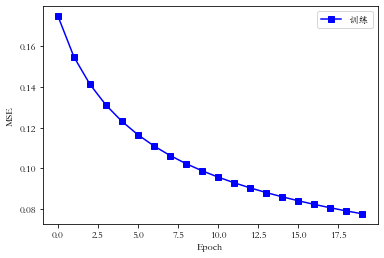

In [109]:
train(epochs=20)

# 以上！